In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm.auto import tqdm

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
df = pd.DataFrame(data = data.data,columns = data.feature_names)

In [ ]:
df['target'] = data.target

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

Here 0 - Malignant
    1 - Benign

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
x = df.drop('target',axis = 1)
y = df['target']

In [ ]:
x.shape

(569, 30)

In [ ]:
y.shape

(569,)

<Axes: >

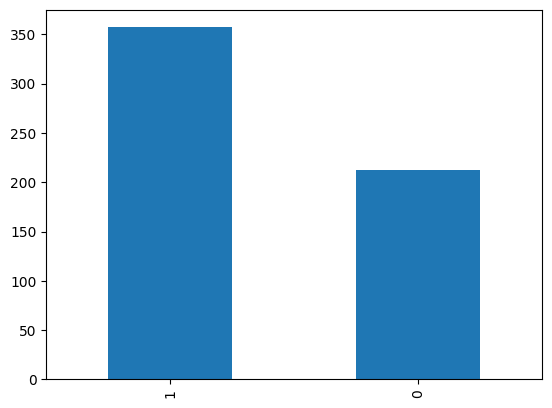

In [ ]:
y.value_counts().plot(kind = 'bar')

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#The dataset have 569 records and 30 independent features

In [ ]:
x.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [ ]:
x.duplicated().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.33,random_state = 42)

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((381, 30), (381,), (188, 30), (188,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [ ]:
ytrain = tf.keras.utils.to_categorical(ytrain)

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape

((381, 30), (381, 2), (188, 30))

In [ ]:
#Input Layer
input = tf.keras.layers.Input(30,name = 'Input')

#Flatten
flatten = tf.keras.layers.Flatten(name = 'Flatten')(input)

#Hidden Layers
hidden1 = tf.keras.layers.Dense(32,activation = 'relu',name = 'Hidden1')(flatten)
hidden2 = tf.keras.layers.Dense(32,activation = 'relu',name = 'Hidden2')(hidden1)

#Output Layer
output = tf.keras.layers.Dense(2,activation = 'softmax', name = 'Output')(hidden2)

In [ ]:
final_model = tf.keras.models.Model(inputs = [input],outputs = [output])

In [ ]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 30)]              0         
                                                                 
 Flatten (Flatten)           (None, 30)                0         
                                                                 
 Hidden1 (Dense)             (None, 32)                992       
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 2)                 66        
                                                                 
Total params: 2114 (8.26 KB)
Trainable params: 2114 (8.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
final_model.compile(optimizer='adam',
                    loss = tf.keras.losses.binary_crossentropy,
                    metrics = 'accuracy')

In [ ]:
final_model.fit(xtrain,ytrain,epochs = 15)

Epoch 1/15
12/12 [==============================] - 1s 3ms/step - loss: 0.7448 - accuracy: 0.4252
Epoch 2/15
12/12 [==============================] - 0s 3ms/step - loss: 0.5896 - accuracy: 0.7927
Epoch 3/15
12/12 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.9213
Epoch 4/15
12/12 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.9423
Epoch 5/15
12/12 [==============================] - 0s 3ms/step - loss: 0.2896 - accuracy: 0.9475
Epoch 6/15
12/12 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9501
Epoch 7/15
12/12 [==============================] - 0s 3ms/step - loss: 0.1805 - accuracy: 0.9528
Epoch 8/15
12/12 [==============================] - 0s 2ms/step - loss: 0.1542 - accuracy: 0.9580
Epoch 9/15
12/12 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9633
Epoch 10/15
12/12 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.9685
Epoch 11/15
12/12 [

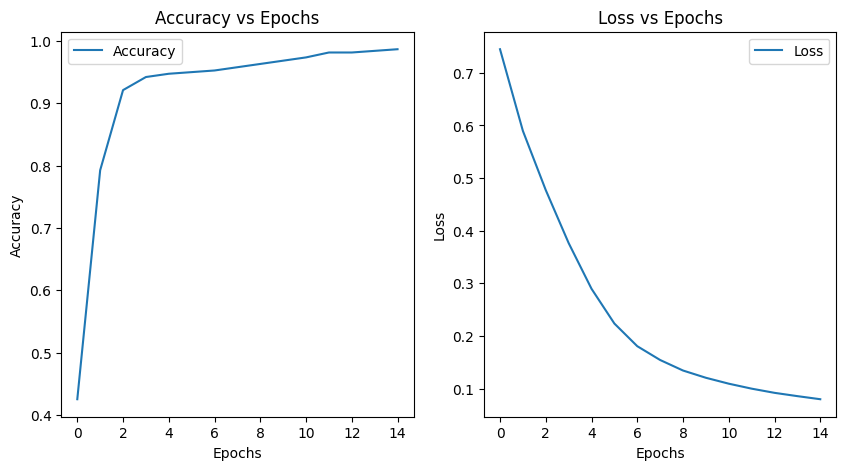

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(final_model.history.history['accuracy'],label = 'Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(final_model.history.history['loss'],label = 'Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
ypred = []
for i in tqdm(xtest):
  pred = final_model.predict(np.expand_dims(i,axis = 0),verbose = 0)
  if pred[0][1]>pred[0][0]:
    ypred.append(1)
  else:
    ypred.append(0)

  0%|          | 0/188 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [ ]:
accuracy_score(ytest,ypred)

0.9787234042553191

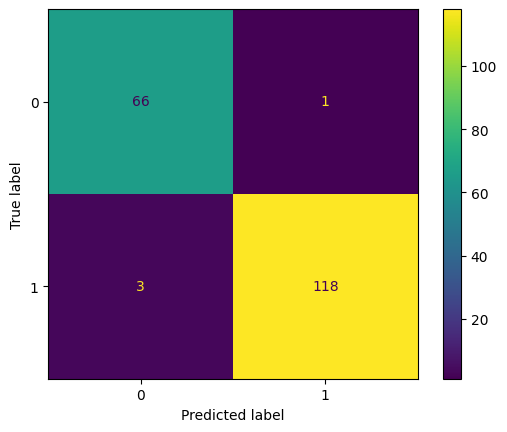

In [ ]:
cm = confusion_matrix(ytest,ypred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print(classification_report(ytest,ypred,target_names = ['Malignant','Benign']))

              precision    recall  f1-score   support

   Malignant       0.96      0.99      0.97        67
      Benign       0.99      0.98      0.98       121

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188

